# Welcome to Pandas Snippets

### import statements

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

### Print Versions

In [2]:
print('tensorflow version ',tf.__version__)
print('pandas version ',pd.__version__)
print('numpy version ', np.__version__)
print('matplotlib version ',matplotlib.__version__)

tensorflow version  1.12.0
pandas version  0.23.4
numpy version  1.15.4
matplotlib version  3.0.2


# List of Topics Memorized
1. [Creating a basic dataframe]
2. [Loading/saving from csv, html]
3. [.concatentate and appending]
4. [ .merge]
5. [ pickling]
6. [ statistics, correlatation tables]
7. [ resampling, missing data, rolling statistics, ]
8. [ .loc,selecting columns, limit rows, ]
9. [ comparison operators, filtering, sorting]
10. [] 
11. [] 
12. []

# Basics
Here we create a basic pandas table/dataframe with 3 rows. Each column's data types are printed. The way the dataframe created here is by providing the column name as the key and its values in list form. Each key in the object corresponds to a different column  
<br>
Pandas dataframes are created by submitting an object within pd.DataFrame. Where keys are the titles to each column and corresponding lists are values. When lists don't match the right len, an error occurs

In [3]:
# https://devdocs.io/pandas~0.23/generated/pandas.dataframe
df = pd.DataFrame({'y': [1, 2, 3],
                       'score': [93.5, 89.4, 90.3],
                       'name': ['Dirac', 'Pauli', 'Bohr'],
                       'birthday': 
                   ['1902-08-08', '1900-04-25', '1885-10-07']})
print(type(df), df.dtypes)

<class 'pandas.core.frame.DataFrame'> birthday     object
name         object
score       float64
y             int64
dtype: object


Printing df.dtypes allows you to see the datatypes for each column


In [4]:
print(df.dtypes)

birthday     object
name         object
score       float64
y             int64
dtype: object


To read from a csv. No indexes are created

In [5]:
csvdf = pd.read_csv('BlackFriday.csv')
csvdf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


### Gathering tables from HTML
### and setting columns

In [6]:
fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
columns = fiddy_states[0][:1]
print(type(columns),  columns.values, columns.values.tolist())
columns = columns.values.tolist()

fiddy_states = fiddy_states[0][1:]
fiddy_states.columns = columns[0]
fiddy_states.set_index('Sl no.', inplace=True)

<class 'pandas.core.frame.DataFrame'> [['Sl no.' 'Abbreviations' 'State Name' 'Capital' 'Became a State']] [['Sl no.', 'Abbreviations', 'State Name', 'Capital', 'Became a State']]


### Pickling 
saving and loading using regular pickle

In [7]:
import pickle

with open('fiddy_states.pickle', 'wb') as pickler:
    pickle.dump(fiddy_states, pickler)

with open('fiddy_states.pickle', 'rb') as picklereader:
    pickledDF = pickle.load(picklereader)


In [8]:
fiddy_states.to_pickle('fiddy_states_fromPD.pickle')
fiddy_statesPickled1 = pd.read_pickle('fiddy_states_fromPD.pickle')
fiddy_statesPickled1

,Abbreviations,State Name,Capital,Became a State
Sl no.,,,,
1,AL,Alabama,Montgomery,"December 14, 1819"
2,AK,Alaska,Juneau,"January 3, 1959"
3,AZ,Arizona,Phoenix,"February 14, 1912"
4,AR,Arkansas,Little Rock,"June 15, 1836"
5,CA,California,Sacramento,"September 9, 1850"
6,CO,Colorado,Denver,"August 1, 1876"
7,CT,Connecticut,Hartford,"January 9, 1788"
8,DE,Delaware,Dover,"December 7, 1787"
9,FL,Florida,Tallahassee,"March 3, 1845"


In [9]:
items2 = pd.Series(data=['1902-08-08', '1900-04-25'], name='birthday')
pd.to_datetime(arg=items2, format='%Y-%m-%d')

0   1902-08-08
1   1900-04-25
Name: birthday, dtype: datetime64[ns]

# Working with Multiple Data Frames

### Difference between Merge, concat, join, append

https://pandas.pydata.org/pandas-docs/stable/merging.html



In [10]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])



df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

frames = [df1, df2, df3]
print(pd.concat(frames, axis=0))
pd.concat(frames, axis=1)

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


### Join Behavior 
join='outer' is the default option and includes all items along the axis <br>
join='inner' is an elected option and will include items from both frame axises only

In [11]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                        'D': ['D2', 'D3', 'D6', 'D7'],
                        'F': ['F2', 'F3', 'F6', 'F7']},
                       index=[6, 7,2, 3])
    

pd.concat([df1, df4], axis=0, sort=True, join='inner')

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
6,B2,D2
7,B3,D3
2,B6,D6
3,B7,D7


hand trick, axis points towards fingers. join_axes manually allows you to choose the represented values on axes on returned frame 

In [12]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                        'D': ['D2', 'D3', 'D6', 'D7'],
                        'F': ['F2', 'F3', 'F6', 'F7']},
                       index=[6, 7,2, 3])
    

pd.concat([df1, df4], axis=1, sort=True, join_axes=[df4.index])

,A,B,C,D,B,D,F
6,NaN,NaN,NaN,NaN,B2,D2,F2
7,NaN,NaN,NaN,NaN,B3,D3,F3
2,A2,B2,C2,D2,B6,D6,F6
3,A3,B3,C3,D3,B7,D7,F7


In [13]:
pd.concat(frames, keys=['x', 'y', 'z']).loc['y']

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [14]:
df1.append([df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [15]:
pd.concat([df1, df4], axis=0, ignore_index=False, join='inner')

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
6,B2,D2
7,B3,D3
2,B6,D6
3,B7,D7


In [16]:
pieces = {'x': df1, 'y': df2, 'z': df3}
result = pd.concat(pieces, keys=['z', 'y'])
result.index.levels

FrozenList([['z', 'y'], [4, 5, 6, 7, 8, 9, 10, 11]])

In [17]:
s2 = pd.Series(['X0', 'X1', 'X2', 'X3'], index=['A', 'B', 'C', 'D'])
df1.append(s2, ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,X0,X1,X2,X3


/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


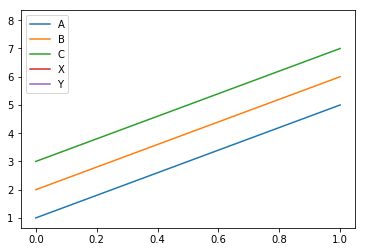

In [18]:
dicts = [{'A': 1, 'B': 2, 'C': 3, 'X': 4},
             {'A': 5, 'B': 6, 'C': 7, 'Y': 8}]
df1.append(dicts, ignore_index=True)
pd.DataFrame([{'A': 1, 'B': 2, 'C': 3, 'X': 4},
             {'A': 5, 'B': 6, 'C': 7, 'Y': 8}]).plot()

In [19]:
result=pd.concat([df1, df4], axis=0, ignore_index=False, join='inner')

# Merge Behavior 

In [20]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                         'A': ['A0', 'A1', 'A2', 'A3'],
                         'B': ['B0', 'B1', 'B2', 'B3']})
    

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
 

pd.merge(left, right, on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


Here is a more complicated example with multiple join keys. Only the keys appearing in left and right are present (the intersection), since how='inner' by default.

In [21]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})

pd.merge(left, right, on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


A fairly common use of the keys argument is to override the column names when creating a new DataFrame based on existing Series. Notice how the default behaviour consists on letting the resulting DataFrame inherit the parent Series’ name, when these existed.

In [22]:
s3 = pd.Series([0, 1, 2, 3], name='foo')

s4 = pd.Series([0, 1, 2, 3])

s5 = pd.Series([0, 1, 4, 5])

pd.concat([s3, s4, s5], axis=1, keys=['red','blue','yellow'])

,red,blue,yellow
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


### Creating a series and concatenating two series on different axis to make a df

Axis differences. When concatenating two items, axis 0 refers to adding to the original column, and axis 1 adds series as another column. do handtrick - it's harder to do y axis with right hand unless you crossover

In [23]:
# https://devdocs.io/pandas~0.23/generated/pandas.series 
items = pd.Series(data=[93.5, 89.4, 90.3], name='score')
print(type(items))

items2 = pd.Series(data=['1902-08-08', '1900-04-25'], name='birthday')
print(items2.dtype)

# https://devdocs.io/pandas~0.23/generated/pandas.concat
print('merged items along index axes:')
print(pd.concat(objs=[items, items2], axis=0))
print('')
print('merged items along column axes:')
print(pd.concat(objs=[items, items2], axis=1))

print('two concatenated series make ', type(pd.concat(objs=[items, items2], axis=1)))

<class 'pandas.core.series.Series'>
object
merged items along index axes:
0          93.5
1          89.4
2          90.3
0    1902-08-08
1    1900-04-25
dtype: object

merged items along column axes:
   score    birthday
0   93.5  1902-08-08
1   89.4  1900-04-25
2   90.3         NaN
two concatenated series make  <class 'pandas.core.frame.DataFrame'>


to_datetime Converts argument to dtype datetime.

In [24]:
items2 = pd.Series(data=['1902-08-08', '1900-04-25'], name='birthday')
df = pd.to_datetime(arg=items2, format='%Y-%m-%d')
print(df)
print(items2)

0   1902-08-08
1   1900-04-25
Name: birthday, dtype: datetime64[ns]
0    1902-08-08
1    1900-04-25
Name: birthday, dtype: object


# Merge two dataframes 

In [25]:
df = pd.DataFrame({'y': [1, 2, 3],
                       'score': [93.5, 89.4, 90.3],
                       'name': ['Dirac', 'Pauli', 'Bohr'],
                       'birthday': ['1902-08-08', '1900-04-25', '1885-10-07']})
df_new = pd.DataFrame(data=list(zip(['Dirac', 'Pauli', 'Bohr', 'Einstein'],
                                    [True, False, True, True])),
                      columns=['name', 'friendly'])

df_merge = pd.merge(left=df, right=df_new, on='name', how='outer')
df_merge

,birthday,name,score,y,friendly
0,1902-08-08,Dirac,93.5,1.0,True
1,1900-04-25,Pauli,89.4,2.0,False
2,1885-10-07,Bohr,90.3,3.0,True
3,NaN,Einstein,NaN,NaN,True


# statistics, correlatation tables

In [26]:
mathTable = [np.random.random(5) for i in range(4)]
mathDF = pd.DataFrame(mathTable)
mathDF

,0,1,2,3,4
0,0.648731,0.085747,0.078616,0.879016,0.765786
1,0.280959,0.862129,0.994011,0.446208,0.537351
2,0.440060,0.703722,0.483367,0.919818,0.124720
3,0.177283,0.638253,0.976764,0.442500,0.552118


In [27]:
mathDF.corr()

,0,1,2,3,4
0,1.000000,-0.792429,-0.973791,0.859423,0.210477
1,-0.792429,1.000000,0.848170,-0.557466,-0.605173
2,-0.973791,0.848170,1.000000,-0.900551,-0.169378
3,0.859423,-0.557466,-0.900551,1.000000,-0.275786
4,0.210477,-0.605173,-0.169378,-0.275786,1.000000


In [28]:
mathDF.describe()

,0,1,2,3,4
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.386758,0.572463,0.633190,0.671886,0.494994
std,0.205381,0.337815,0.439027,0.263263,0.268010
min,0.177283,0.085747,0.078616,0.442500,0.124720
25%,0.255040,0.500127,0.382179,0.445281,0.434194
50%,0.360509,0.670988,0.730066,0.662612,0.544735
75%,0.492228,0.743324,0.981076,0.889217,0.605535
max,0.648731,0.862129,0.994011,0.919818,0.765786


In [29]:
mathDF['hello'] = mathDF[0]*7/mathDF[1]
mathDF

,0,1,2,3,4,hello
0,0.648731,0.085747,0.078616,0.879016,0.765786,52.959695
1,0.280959,0.862129,0.994011,0.446208,0.537351,2.281225
2,0.440060,0.703722,0.483367,0.919818,0.124720,4.377321
3,0.177283,0.638253,0.976764,0.442500,0.552118,1.944339


# resampling, missing data, rolling statistics

In [30]:
from datetime import datetime, timedelta

a = [[datetime.now().replace(microsecond=0,second=0,minute=0)+timedelta(hours=i)][0] for i in range(100000)]
aString = [a[i].strftime("%Y-%m-%d %H:%M:%S") for i in range(len(a))]
y = np.random.random(len(a))
# len(a)== len(y)
# y
samplingData = pd.DataFrame({'datetime': pd.to_datetime(a), 'dateString': aString , 'random': y})
samplingData.set_index('datetime', inplace=True)
samplingData.dtypes


dateString     object
random        float64
dtype: object

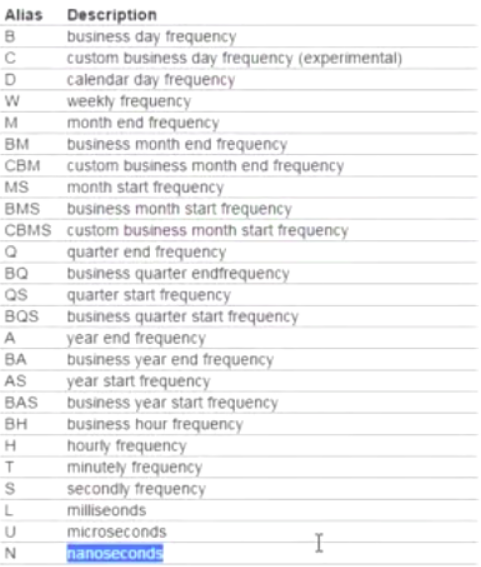

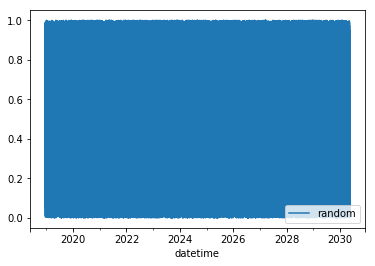

In [31]:
samplingData[['dateString','random']].plot()

In [32]:
samplingData['random1yr'] = samplingData['random'].resample('a', how='mean')
samplingData['random1m'] = samplingData['random'].resample('m', how='mean')
samplingData['random'] = samplingData['random']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


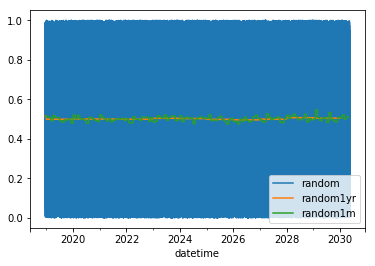

In [33]:
droppedNA = samplingData.dropna()

droppedNA
samplingData.fillna(method='bfill',inplace=True)
samplingData.plot()

## Rolling Statistics
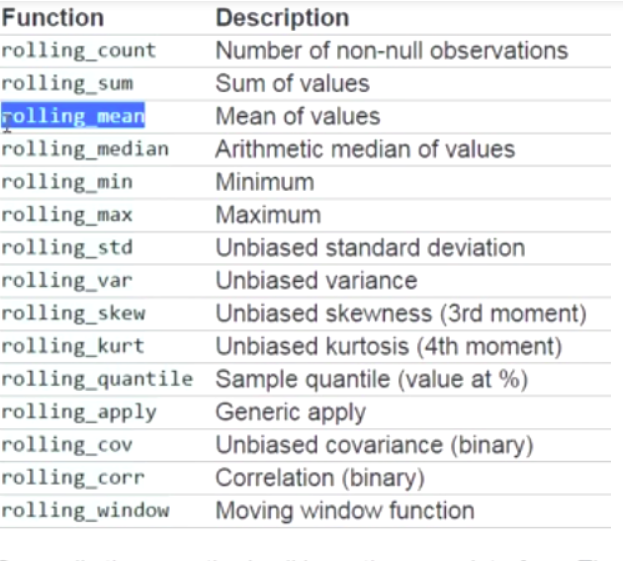

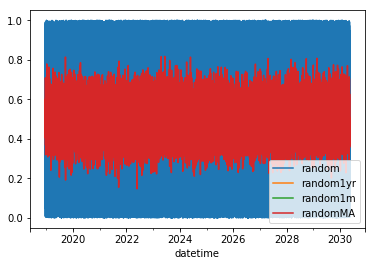

In [34]:
samplingData['randomMA'] = samplingData['random'].rolling(12).mean()
samplingData.plot()

### Pandas Loc and iloc
Labels are values on the index or columns and can be used to filter pandas dataframes using the loc, iloc and ix commands

In [38]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head(3)
ufo.loc[0,:]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [39]:
ufo.loc[0:2,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [44]:
ufo.loc[0:2,'City']
ufo.loc[0:2,['City', 'State']]
ufo.loc[0:2,'City':'State']
ufo.loc[0:2,'State':'City':-1]
ufo.head(3).drop('Time', axis=1)

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


## Boolean Conditions

In [60]:
ufo[ufo.City=='Dallas'].head(3)

,City,Colors Reported,Shape Reported,State,Time
37,Dallas,NaN,SPHERE,TX,7/15/1945 14:00
392,Dallas,NaN,NaN,TX,1/1/1957 21:00
414,Dallas,NaN,OTHER,TX,6/30/1957 0:00


In [59]:
ufo.loc[ufo.City=='Dallas', [ 'City','State']]
ufo.loc[(ufo.City=='Dallas') & (ufo['State']=='TX'), [ 'City','State']].head(3)


,City,State
37,Dallas,TX
392,Dallas,TX
414,Dallas,TX


iloc is for filtering rows and column by integer positions. iloc is exclusive of second # and inclusive of first number 1st:2nd. loc is inclusive on both sides

In [58]:
ufo.iloc[:,[0,3]].head(3)

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [62]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry', index_col='country')
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [65]:
drinks.ix['Albania', 0]
drinks.ix[1, 'beer_servings']


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


89

### Comparative Operators and Outlier Detection

In [78]:
df = pd.DataFrame({'Data':np.random.normal(size=200)})
# example dataset of normally distributed data. 

df[np.abs(df.Data-df.Data.mean()) <= (3*df.Data.std())].head(3)
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

df.loc[np.abs(df.Data-df.Data.mean()) <= (3*df.Data.std()), :].head(3)

,Data
0,-0.694445
1,-0.612728
2,0.771376


In [80]:

df[~(np.abs(df.Data - df.Data.mean()) > (3*df.Data.std()))].head(3)
# or if you prefer the other way around

df.loc[np.abs(df.Data-df.Data.mean()) > (1*df.Data.std()), :].head(3)

,Data
4,-1.548199
7,2.308564
10,-1.213999


# Plotting

# imports 

In [12]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Basic Plot

(array([0., 2., 4., 6., 8.]), 2.0)


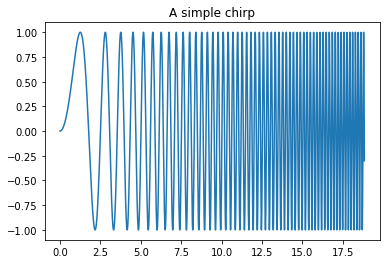

In [6]:
# https://devdocs.io/numpy~1.14/generated/numpy.linspace
print(np.linspace(0,10, num=5,endpoint=False, retstep=True))
x = np.linspace(0, 6*np.pi, 5000)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp')
plt.show()

line Plots are generally easy. plt has several methods which sets the plot for example, xlabel, ylabel, title, and plot which sets properties of the line plot

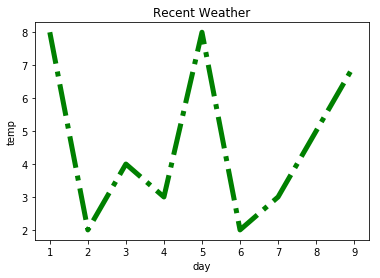

In [14]:
x = list(range(1,10))
y = [random.randint(1,10) for i in x]
plt.xlabel('day')
plt.ylabel('temp')
plt.title('Recent Weather')
plt.plot(x,y, color='green', linewidth=5, linestyle='dashdot')

### string formatting 

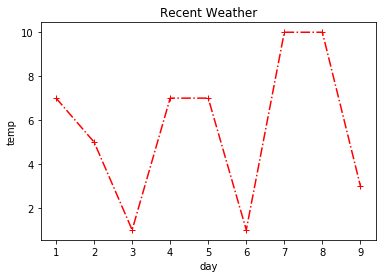

In [17]:
x = list(range(1,10))
y = [random.randint(1,10) for i in x]
plt.xlabel('day')
plt.ylabel('temp')
plt.title('Recent Weather')
plt.plot(x,y, 'r+-.')

### Multiline Chart

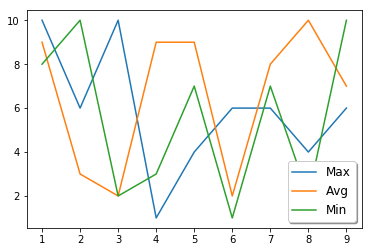

In [30]:
x = list(range(1,10))
y = [random.randint(1,10) for i in x]
y2 = [random.randint(1,10) for i in x]
y3= [random.randint(1,10) for i in x]
plt.plot(x,y, label='Max')
plt.plot(x,y2, label='Avg')
plt.plot(x,y3, label='Min')
plt.legend(loc="lower right", shadow=True, fontsize="large")

In [46]:
company = ['GOOGL','AMZN', 'MSFT', 'FB']
revenue = [90,136,89,27]
xpos = np.arange(len(company))
profit=[40,2,34,12]
print(ypos)

[0 1 2 3]


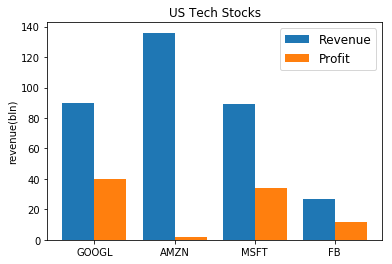

In [49]:
plt.xticks(ypos,company)
plt.ylabel('revenue(bln)')
plt.title('US Tech Stocks')
plt.bar(xpos-.2,revenue,width=.4, label='Revenue') 
plt.bar(xpos+.2,profit,width=.4, label='Profit') 
plt.legend(loc=1, fontsize='large')

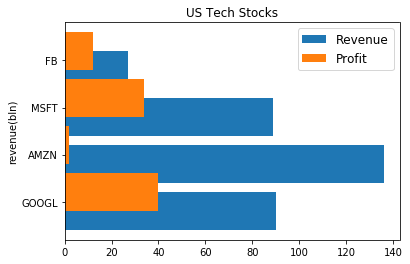

In [52]:
plt.yticks(ypos,company)
plt.ylabel('revenue(bln)')
plt.title('US Tech Stocks')
plt.barh(xpos-.2,revenue, label='Revenue') 
plt.barh(xpos+.2,profit, label='Profit') 
plt.legend(loc=1, fontsize='large')

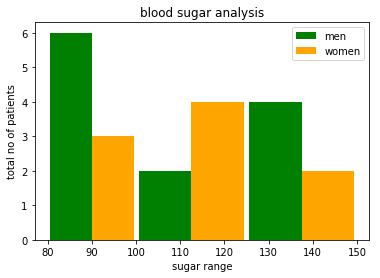

In [55]:
blood_sugar_men = [113,85,90,150,149,88,93,115,135,80,77,82,129]
blood_sugar_women = [67,98,89,120,133,150,8,69,89,79,120,112,100]

plt.xlabel('sugar range')
plt.ylabel('total no of patients')
plt.title('blood sugar analysis')

plt.hist([blood_sugar_men,blood_sugar_women], bins=[80,100,125,150], rwidth=.95, color=['green','orange'],label=['men','women'])
plt.legend()

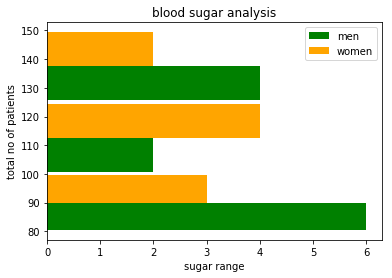

In [56]:
blood_sugar_men = [113,85,90,150,149,88,93,115,135,80,77,82,129]
blood_sugar_women = [67,98,89,120,133,150,8,69,89,79,120,112,100]

plt.xlabel('sugar range')
plt.ylabel('total no of patients')
plt.title('blood sugar analysis')

plt.hist([blood_sugar_men,blood_sugar_women], bins=[80,100,125,150], 
         orientation='horizontal',rwidth=.95, color=['green','orange'],label=['men','women'])
plt.legend()

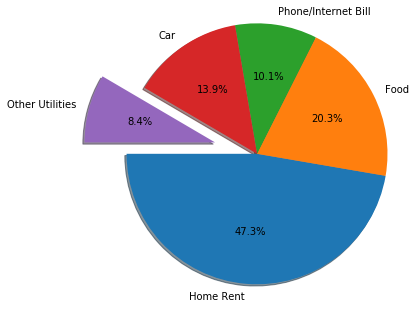

<Figure size 432x288 with 0 Axes>

In [30]:
exp_vals= [1400,600,300,410,250]
exp_labels = ['Home Rent', 'Food', 'Phone/Internet Bill', 
              'Car', 'Other Utilities']
plt.pie(exp_vals,labels= exp_labels, radius=1.5, autopct="%0.1f%%",
        shadow=True, explode=[0,0,0,0,.5], startangle=180)
#plt.show takes away outputs of creating this pie chart (looks like noise)
plt.show()
plt.savefig('pieChart.png')

In [28]:
start = pd.Timestamp('2015-07-01')
end = pd.Timestamp('2015-08-01')
t = np.linspace(start.value, end.value, 100)
t = pd.to_datetime(t)
# np.asarray(t)